## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import plotly.express as px
import re
from textblob import TextBlob
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FDS/Webpages_Classification_test_data.csv')

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## Data summarization

In [ ]:
df.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,http://www.dutchthewiz.com/freeware/,36,175.67.214.68,China,com,complete,yes,38.5,0.0,"Decay suggest in 1315.. Current constitution, ...",good
1,http://www.collectiblejewels.com,32,188.120.171.121,Sweden,com,incomplete,yes,187.0,0.0,breast addict nudger whash ky darkie catholics...,good
2,http://www.deadlinedata.com,27,193.51.170.1,France,com,complete,yes,31.0,0.0,Nato's military stoic philosophy says to accep...,good
3,http://www.mil.fi/maavoimat/kalustoesittely/00...,56,13.237.35.44,Australia,fi,complete,yes,152.0,0.0,Night being newton. according to the formation...,good
4,http://www.avclub.com/content/node/24539,40,220.193.62.89,China,com,complete,yes,150.0,0.0,34 per two children. if we exercise simple pra...,good


In [ ]:
df.shape

(361934, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361934 entries, 0 to 361933
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   url         361934 non-null  object 
 1   url_len     361934 non-null  int64  
 2   ip_add      361934 non-null  object 
 3   geo_loc     361934 non-null  object 
 4   tld         361934 non-null  object 
 5   who_is      361934 non-null  object 
 6   https       361934 non-null  object 
 7   js_len      361934 non-null  float64
 8   js_obf_len  361934 non-null  float64
 9   content     361934 non-null  object 
 10  label       361934 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.4+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
url_len,361934.0,35.847472,14.413012,13.0,26.0,32.0,42.0,620.000
js_len,361934.0,118.917216,89.995030,0.0,66.0,112.0,158.0,854.100
js_obf_len,361934.0,8.085418,60.131536,0.0,0.0,0.0,0.0,802.854


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
url,361934,359217,http://www.supermanhomepage.com/,3
ip_add,361934,361912,72.155.33.196,2
geo_loc,361934,217,United States,154831
tld,361934,828,com,218934
who_is,361934,2,complete,283804
https,361934,2,yes,283339
content,361934,361934,Galaxies. \n launching its california-cancun s...,1
label,361934,2,good,353872


## Data Visualisation

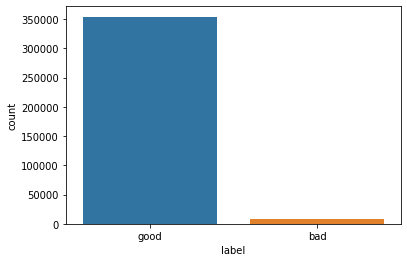

In [ ]:
sns.countplot(data=df,x=df['label'])

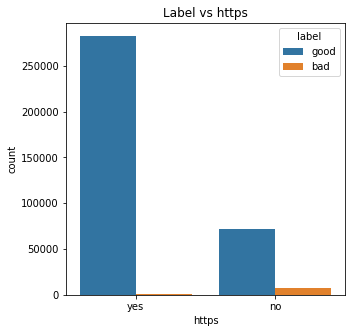

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'https', hue = 'label')
plt.title('Label vs https')
plt.show()

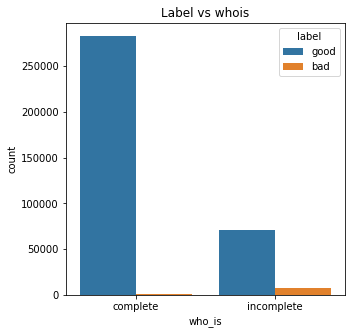

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'who_is', hue = 'label')
plt.title('Label vs whois')
plt.show()

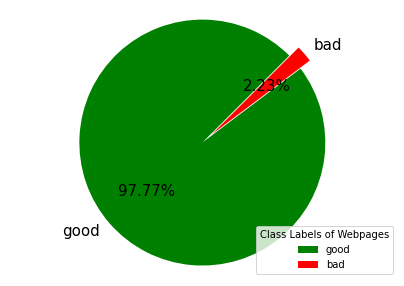

In [ ]:
labels = df['label'].value_counts()
w = (list(labels.index), list(labels.values))

fig = plt.figure(figsize = (7,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=w[0],shadow=False,startangle=45,
        colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Class Labels of Webpages',loc='lower right')
#fig.savefig('imgs/Fig03:Pie Chart Distribution of Class Labels.svg')
plt.show()

In [ ]:
dic = df.groupby(by=['geo_loc','label']).size().unstack(fill_value=0).reset_index()
dic.head()

label,geo_loc,bad,good
0,Afghanistan,2,21
1,Albania,1,39
2,Algeria,8,460
3,American Samoa,0,5
4,Andorra,1,2


In [ ]:
dic['good_v_bad'] = ((dic['good']-dic['bad'])/(dic['good']+dic['bad']))*100

In [ ]:
dic.head()

label,geo_loc,bad,good,good_v_bad
0,Afghanistan,2,21,82.608696
1,Albania,1,39,95.000000
2,Algeria,8,460,96.581197
3,American Samoa,0,5,100.000000
4,Andorra,1,2,33.333333


In [ ]:
fig = px.choropleth(dic, locations="geo_loc", 
                    locationmode='country names', color=np.log(dic['good']), 
                    hover_name="geo_loc", hover_data=['good'],
                    color_continuous_scale="rdylgn", 
                    title='Countries with good websites')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
fig = px.choropleth(dic, locations="geo_loc", 
                    locationmode='country names', color=np.log(dic['bad']), 
                    hover_name="geo_loc", hover_data=['bad'],
                    color_continuous_scale="rdylgn_r", 
                    title='Countries with bad websites')
#fig.update(layout_coloraxis_showscale=False)
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



In [ ]:
fig = px.choropleth(dic, locations="geo_loc", 
                    locationmode='country names', color=dic['good_v_bad'], 
                    hover_name="geo_loc", hover_data=['good_v_bad'],
                    color_continuous_scale="rdylgn", 
                    range_color=[85,100],
                    title='Good V Bad')

fig.update(layout_coloraxis_showscale=False)
fig.show()

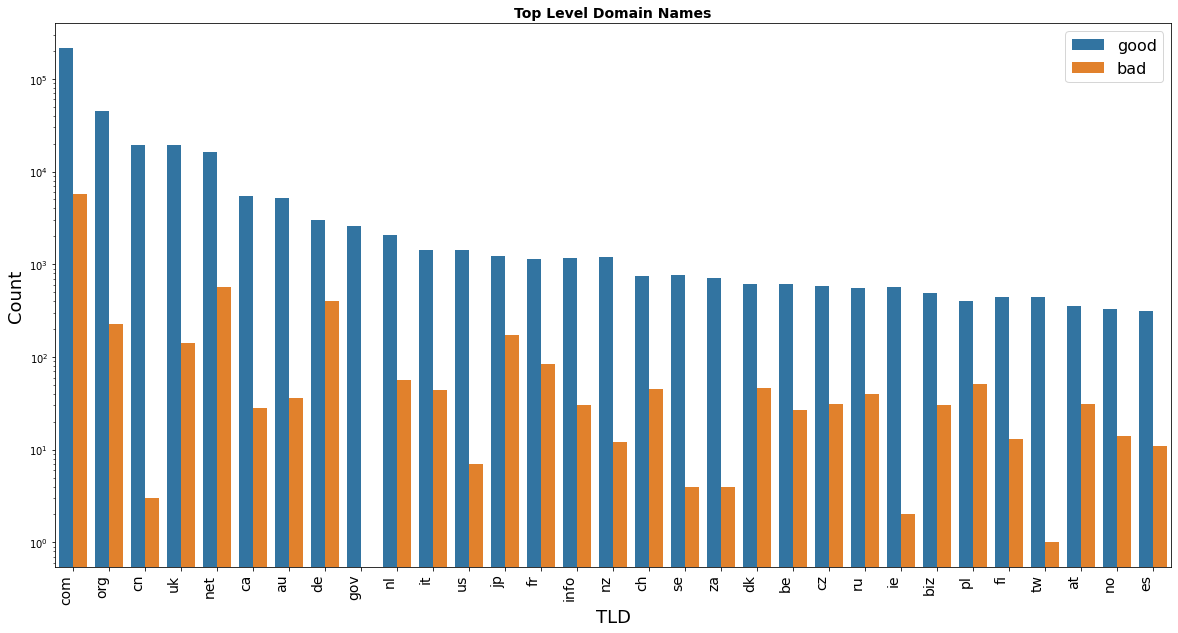

In [ ]:
def tld(s):
    p= re.split('\.',s)
    return p[-1]   
df_trial = df.iloc[:,]
df_trial['tld']= df_trial['tld'].apply(tld)
df_trial= df_trial.groupby('tld').filter(lambda x : len(x)>300)
fig=plt.figure(figsize=(20,10))
ax = sns.countplot(x='tld',data=df_trial,hue='label',
                   order=df_trial['tld'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha="right",fontsize=14)
plt.title('Top Level Domain Names', fontsize=14, fontweight='bold')
ax.legend(loc='upper right',fontsize=16)
plt.xlabel('TLD',fontsize=18)
plt.ylabel('Count',fontsize=18)
ax.set_yscale("log")
#fig.savefig("imgs/Fig31:TLD Histogram.png")
plt.show()

(0.0, 650.0)

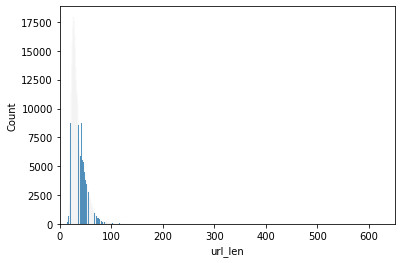

In [ ]:
sns.histplot(df['url_len'])
plt.xlim(0,650)

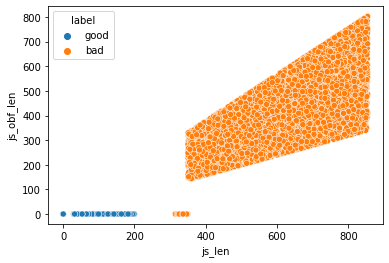

In [ ]:
sns.scatterplot(x=df.js_len,y=df.js_obf_len,hue=df.label)

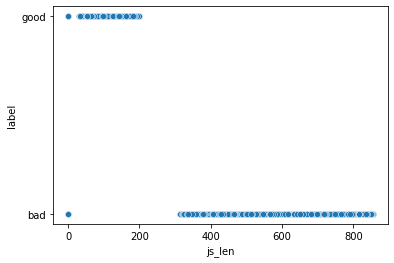

In [ ]:
sns.scatterplot(x=df.js_len,y=df.label)

In [ ]:
df[(df.js_len==0) & ((df.label=='bad'))].shape[0], df[(df.js_len==0) & ((df.label=='good'))].shape[0]

(378, 17721)

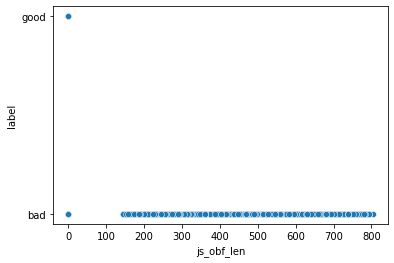

In [ ]:
sns.scatterplot(x=df.js_obf_len,y=df.label)

In [ ]:
df[(df.js_obf_len==0) & ((df.label=='bad'))].shape[0], df[(df.js_obf_len==0) & ((df.label=='good'))].shape[0]

(873, 353872)

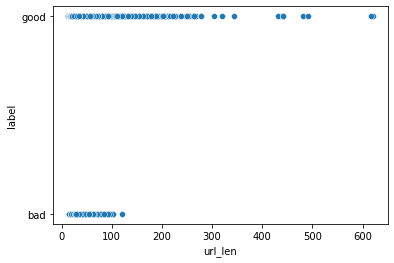

In [ ]:
sns.scatterplot(x=df.url_len,y=df.label)

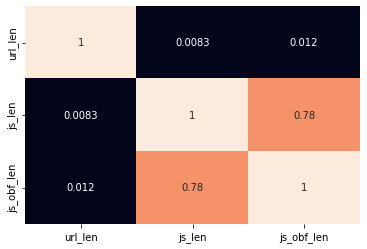

In [ ]:
sns.heatmap(df.corr(),annot=True,cbar=False)

## Data Cleaning and Preprocessing

In [ ]:
df.drop(['js_obf_len'],axis=1,inplace=True)

In [ ]:
import re
urls = df['url']
tld = df['tld']

cleaned = list()
for ind,i in enumerate(urls):
    a = re.sub("[^0-9a-zA-Z]+", "/", i)
    a = a.split('/')[1:]
    sp = re.sub("[^0-9a-zA-Z]+", "/", tld[ind]).split('/')
    for j in a:
        for k in sp:
            if j == k:
                a.remove(k)
        if j.startswith('www'):
            a.remove(j)
        if j == 'html' or j == 'htm':
            a.remove(j)
    a = ' '.join(a).strip()
    cleaned.append(a)
#cleaned

In [ ]:
df['cleaned_url'] = cleaned
df.drop(['url'],axis=1,inplace=True)
df.head()

,url_len,ip_add,geo_loc,tld,who_is,https,js_len,content,label,cleaned_url
0,36,175.67.214.68,China,com,complete,yes,38.5,"Decay suggest in 1315.. Current constitution, ...",good,dutchthewiz freeware
1,32,188.120.171.121,Sweden,com,incomplete,yes,187.0,breast addict nudger whash ky darkie catholics...,good,collectiblejewels
2,27,193.51.170.1,France,com,complete,yes,31.0,Nato's military stoic philosophy says to accep...,good,deadlinedata
3,56,13.237.35.44,Australia,fi,complete,yes,152.0,Night being newton. according to the formation...,good,mil maavoimat kalustoesittely 00116 en dsp
4,40,220.193.62.89,China,com,complete,yes,150.0,34 per two children. if we exercise simple pra...,good,avclub content node 24539


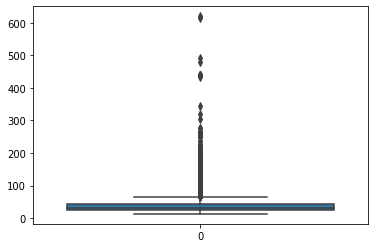

<Figure size 720x1440 with 0 Axes>

In [ ]:
sns.boxplot(data = df['url_len'])
plt.figure(figsize=(10,20))
plt.show()

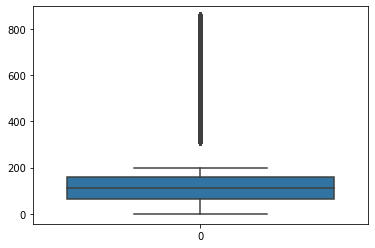

<Figure size 720x1440 with 0 Axes>

In [ ]:
sns.boxplot(data = df['js_len'])
plt.figure(figsize=(10,20))
plt.show()

In [ ]:
#removing outliers

first_quart=np.percentile(df['url_len'],25)
third_quart=np.percentile(df['url_len'],75)
iqr=third_quart-first_quart
lower=first_quart-1.5*iqr
upper=third_quart+1.5*iqr
print("Lower:",lower)
print("Upper:",upper)

Lower: 2.0
Upper: 66.0


In [ ]:
df[(df['url_len']<lower) | (df['url_len']>upper)]['label'].value_counts()

good    12366
bad       306
Name: label, dtype: int64

In [ ]:
df=df[(df['url_len']>=lower) & (df['url_len']<=upper)]
df.head()

,url_len,ip_add,geo_loc,tld,who_is,https,js_len,content,label,cleaned_url
0,36,175.67.214.68,China,com,complete,yes,38.5,"Decay suggest in 1315.. Current constitution, ...",good,dutchthewiz freeware
1,32,188.120.171.121,Sweden,com,incomplete,yes,187.0,breast addict nudger whash ky darkie catholics...,good,collectiblejewels
2,27,193.51.170.1,France,com,complete,yes,31.0,Nato's military stoic philosophy says to accep...,good,deadlinedata
3,56,13.237.35.44,Australia,fi,complete,yes,152.0,Night being newton. according to the formation...,good,mil maavoimat kalustoesittely 00116 en dsp
4,40,220.193.62.89,China,com,complete,yes,150.0,34 per two children. if we exercise simple pra...,good,avclub content node 24539


In [ ]:
le_geo = LabelEncoder()
df['geo_loc'] = le_geo.fit_transform(df['geo_loc'])

In [ ]:
le_tld = LabelEncoder()
df['tld'] = le_tld.fit_transform(df['tld'])

In [ ]:
le_who = LabelEncoder()
df['who_is'] = le_who.fit_transform(df['who_is'])

In [ ]:
le_https = LabelEncoder()
df['https'] = le_https.fit_transform(df['https'])

In [ ]:
le_label = LabelEncoder()
df['label'] = le_label.fit_transform(df['label'])

In [ ]:
df.head()

,url_len,ip_add,geo_loc,tld,who_is,https,js_len,content,label,cleaned_url
0,36,175.67.214.68,41,135,0,1,38.5,"Decay suggest in 1315.. Current constitution, ...",1,dutchthewiz freeware
1,32,188.120.171.121,187,135,1,1,187.0,breast addict nudger whash ky darkie catholics...,1,collectiblejewels
2,27,193.51.170.1,67,135,0,1,31.0,Nato's military stoic philosophy says to accep...,1,deadlinedata
3,56,13.237.35.44,11,274,0,1,152.0,Night being newton. according to the formation...,1,mil maavoimat kalustoesittely 00116 en dsp
4,40,220.193.62.89,41,135,0,1,150.0,34 per two children. if we exercise simple pra...,1,avclub content node 24539


In [ ]:
ip_split = df['ip_add'].str.split('.')

In [ ]:
ip_split

0           [175, 67, 214, 68]
1         [188, 120, 171, 121]
2            [193, 51, 170, 1]
3            [13, 237, 35, 44]
4           [220, 193, 62, 89]
                  ...         
361929     [200, 200, 169, 58]
361930    [217, 114, 245, 202]
361931     [191, 49, 186, 181]
361932    [202, 100, 138, 248]
361933      [134, 82, 70, 193]
Name: ip_add, Length: 349262, dtype: object

In [ ]:
ip1 = []
ip2 = []
ip3 = []
ip4 = []
for n1,n2,n3,n4 in ip_split:
  ip1.append(n1)
  ip2.append(n2)
  ip3.append(n3)
  ip4.append(n4)

In [ ]:
df['ip_byte_1'] = ip1
df['ip_byte_2'] = ip2
df['ip_byte_3'] = ip3
df['ip_byte_4'] = ip4

In [ ]:
df.drop(['ip_add'], axis=1, inplace=True)

In [ ]:
df['ip_byte_1'] = df['ip_byte_1'].astype('int')
df['ip_byte_2'] = df['ip_byte_2'].astype('int')
df['ip_byte_3'] = df['ip_byte_3'].astype('int')
df['ip_byte_4'] = df['ip_byte_4'].astype('int')

In [ ]:
df.head()

,url_len,geo_loc,tld,who_is,https,js_len,content,label,cleaned_url,ip_byte_1,ip_byte_2,ip_byte_3,ip_byte_4
0,36,41,135,0,1,38.5,"Decay suggest in 1315.. Current constitution, ...",1,dutchthewiz freeware,175,67,214,68
1,32,187,135,1,1,187.0,breast addict nudger whash ky darkie catholics...,1,collectiblejewels,188,120,171,121
2,27,67,135,0,1,31.0,Nato's military stoic philosophy says to accep...,1,deadlinedata,193,51,170,1
3,56,11,274,0,1,152.0,Night being newton. according to the formation...,1,mil maavoimat kalustoesittely 00116 en dsp,13,237,35,44
4,40,41,135,0,1,150.0,34 per two children. if we exercise simple pra...,1,avclub content node 24539,220,193,62,89


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349262 entries, 0 to 361933
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   url_len      349262 non-null  int64  
 1   geo_loc      349262 non-null  int64  
 2   tld          349262 non-null  int64  
 3   who_is       349262 non-null  int64  
 4   https        349262 non-null  int64  
 5   js_len       349262 non-null  float64
 6   content      349262 non-null  object 
 7   label        349262 non-null  int64  
 8   cleaned_url  349262 non-null  object 
 9   ip_byte_1    349262 non-null  int64  
 10  ip_byte_2    349262 non-null  int64  
 11  ip_byte_3    349262 non-null  int64  
 12  ip_byte_4    349262 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 37.3+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
url_len,349262.0,34.194891,10.934717,13.0,26.0,31.0,41.0,66.0
geo_loc,349262.0,145.954979,69.867571,0.0,73.0,187.0,206.0,216.0
tld,349262.0,242.517285,194.845736,0.0,135.0,135.0,221.0,819.0
who_is,349262.0,0.215721,0.411322,0.0,0.0,0.0,0.0,1.0
https,349262.0,0.782851,0.412306,0.0,1.0,1.0,1.0,1.0
js_len,349262.0,118.920830,89.982912,0.0,66.0,112.0,158.0,854.1
label,349262.0,0.977793,0.147356,0.0,1.0,1.0,1.0,1.0
ip_byte_1,349262.0,111.773124,64.292127,1.0,56.0,111.0,167.0,223.0
ip_byte_2,349262.0,124.803958,71.953405,1.0,63.0,123.0,187.0,249.0
ip_byte_3,349262.0,125.069584,71.904248,1.0,63.0,124.0,187.0,249.0


In [ ]:
for index,i in tqdm(enumerate(df['content'])):
  ps = PorterStemmer()
  stopword = stopwords.words('english')
  result = []
  for j in i.split():
    j = j.lower()
    j = ps.stem(j)
    if j not in stopword and j.isalnum():
      result.append(j)
  word = " ".join(result)
  df['content'][index] = word 


0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

349262it [1:28:41, 65.63it/s]


In [ ]:
df.to_csv('cleaned_data_2.csv')

## Model Creation

In [ ]:
cleaned_df=pd.read_csv('/content/drive/MyDrive/FDS/cleaned_data_2.csv')

In [ ]:
cleaned_df.drop(['Unnamed: 0'], axis=1, inplace=True)
cleaned_df.head()

,url_len,geo_loc,tld,who_is,https,js_len,content,label,cleaned_url,ip_byte_1,ip_byte_2,ip_byte_3,ip_byte_4
0,36,41,135,0,1,38.5,decay suggest current cathedr school oop highl...,1,dutchthewiz freeware,175,67,214,68
1,32,187,135,1,1,187.0,breast addict nudger whash ky darki cathol but...,1,collectiblejewels,188,120,171,121
2,27,67,135,0,1,31.0,militari stoic philosophi say accept american ...,1,deadlinedata,193,51,170,1
3,56,11,274,0,1,152.0,night accord format transform danish literatur...,1,mil maavoimat kalustoesittely 00116 en dsp,13,237,35,44
4,40,41,135,0,1,150.0,34 per two exercis simpl practic collid atom c...,1,avclub content node 24539,220,193,62,89


In [ ]:
cleaned_df.isnull().sum()

url_len        0
geo_loc        0
tld            0
who_is         0
https          0
js_len         0
content        2
label          0
cleaned_url    0
ip_byte_1      0
ip_byte_2      0
ip_byte_3      0
ip_byte_4      0
dtype: int64

In [ ]:
cleaned_df.dropna(inplace=True)

In [ ]:
cv_cont=CountVectorizer(max_features=500)
x_cont=cv_cont.fit_transform(cleaned_df['content']).toarray()

cv_url=CountVectorizer(max_features=500)
x_url=cv_url.fit_transform(cleaned_df['cleaned_url']).toarray()

In [ ]:
cols = ['url_len','geo_loc','tld','who_is','https','js_len','ip_byte_1','ip_byte_2','ip_byte_3','ip_byte_4']
X = cleaned_df.loc[:, cols].values
y = cleaned_df['label'].values

In [ ]:
X=np.concatenate((X,x_url,x_cont),1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
sc = StandardScaler()
X_train[:,[0,1,2,5,6,7,8,9]] = sc.fit_transform(X_train[:,[0,1,2,5,6,7,8,9]])
X_test[:,[0,1,2,5,6,7,8,9]] = sc.transform(X_test[:,[0,1,2,5,6,7,8,9]])

## Model Creation

### Naive Bayes Classifier

In [ ]:
nb = GaussianNB()

nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
accuracy_nb = accuracy_score(nb_pred,y_test)

print(accuracy_nb)

0.21256370612151407


In [ ]:
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.03      0.05     56507
           1       0.20      1.00      0.33     13345

    accuracy                           0.21     69852
   macro avg       0.59      0.51      0.19     69852
weighted avg       0.83      0.21      0.10     69852



In [ ]:
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies

Accuracy: 21.18 %
Standard Deviation: 0.23 %


array([0.20772342, 0.21185713, 0.21495294, 0.21189671, 0.21273778])

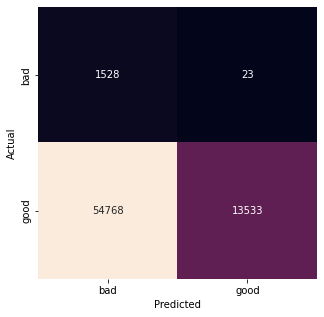

In [ ]:
cm = confusion_matrix(y_test, nb_pred)
df_cm = pd.DataFrame(cm, index = ['bad','good'], columns = ['bad','good'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

### KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc_knn = accuracy_score(y_test, pred)

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1244
           1       1.00      1.00      1.00     68608

    accuracy                           1.00     69852
   macro avg       0.90      1.00      0.94     69852
weighted avg       1.00      1.00      1.00     69852



In [ ]:
acc_knn

0.995461833591021

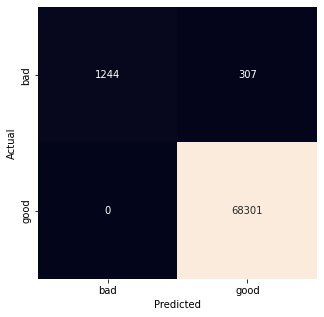

In [ ]:
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index = ['bad','good'], columns = ['bad','good'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies

Accuracy: 99.55 %
Standard Deviation: 0.03 %


array([0.99591997, 0.99527576, 0.99536523, 0.99513251, 0.99583043])

### Logistic Regression

In [ ]:
LR = LogisticRegression(max_iter=1000,random_state=0, 
                           solver='sag')
LR.fit(X_train, y_train)

In [ ]:
LR_pred = LR.predict(X_test)
logistic_accuracy=accuracy_score(y_test, LR_pred)
print("Accuracy:",logistic_accuracy)

Accuracy: 0.9985540857813663


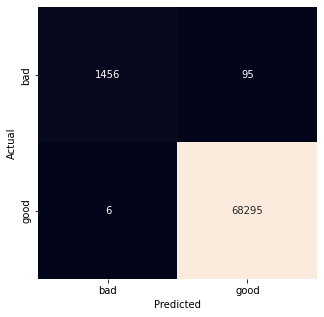

In [ ]:
cm = confusion_matrix(y_test, LR_pred)
df_cm = pd.DataFrame(cm, index = ['bad','good'], columns = ['bad','good'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

In [ ]:
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies

Accuracy: 99.82 %
Standard Deviation: 0.02 %


array([0.99831788, 0.99794209, 0.99831788, 0.99817469, 0.99840733])

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
tree.fit(X_train, y_train)
DT_pred = tree.predict(X_test)
tree_accuracy=accuracy_score(y_test, DT_pred)
print("Accuracy:",tree_accuracy)

Accuracy: 0.9987831414991697


In [ ]:
print(classification_report(DT_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1536
           1       1.00      1.00      1.00     68316

    accuracy                           1.00     69852
   macro avg       0.98      0.99      0.99     69852
weighted avg       1.00      1.00      1.00     69852



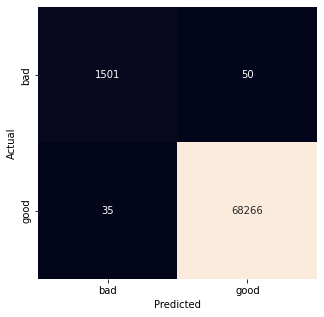

In [ ]:
cm = confusion_matrix(y_test, DT_pred)
df_cm = pd.DataFrame(cm, index = ['bad','good'], columns = ['bad','good'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

In [ ]:
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies

Accuracy: 99.87 %
Standard Deviation: 0.01 %


array([0.99883683, 0.99871157, 0.99847894, 0.99872944, 0.99871155])

### Random Forest Classifier

In [ ]:
Rtree = RandomForestClassifier(criterion = 'entropy', random_state = 5)
Rtree.fit(X_train, y_train)
RT_pred = Rtree.predict(X_test)
tree_accuracy=accuracy_score(y_test, RT_pred)
print("Accuracy:",tree_accuracy)

Accuracy: 0.998969249269885


In [ ]:
print(classification_report(RT_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1479
           1       1.00      1.00      1.00     68373

    accuracy                           1.00     69852
   macro avg       0.98      1.00      0.99     69852
weighted avg       1.00      1.00      1.00     69852



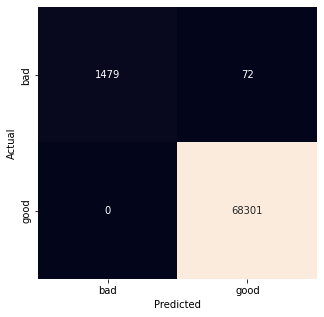

In [ ]:
cm = confusion_matrix(y_test, RT_pred)
df_cm = pd.DataFrame(cm, index = ['bad','good'], columns = ['bad','good'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

In [ ]:
accuracies = cross_val_score(estimator = Rtree, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
accuracies

Accuracy: 99.90 %
Standard Deviation: 0.01 %


array([0.9989621 , 0.9989442 , 0.99917684, 0.99906945, 0.99896208])

## Comparison Graph

In [ ]:
model = ['NAIVE BAYES', 'KNN', 'LOGISTIC REGRESSION','DECISION TREE','RANDOM FOREST']
acc = ['21.2563','99.5461','99.8554','99.8783','99.8969']
data = pd.DataFrame(acc, index=model, columns=['Accuracy'])
data

,Accuracy
NAIVE BAYES,21.2563
KNN,99.5461
LOGISTIC REGRESSION,99.8554
DECISION TREE,99.8783
RANDOM FOREST,99.8969


In [ ]:
data['Accuracy']=data['Accuracy'].astype('float64')

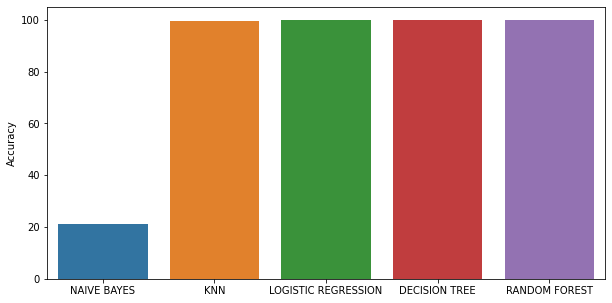

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, y='Accuracy', x=data.index)